# SpringBoard 8.4: Apply Inferential Statistics

### Data Preparation




In [3]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#set up a custom qualitative color palette
xkcd_colors = ['purple','green','blue','pink','brown','red','light blue',\
              'tan','light green','magenta','yellow','sky blue','teal','orange','light purple']
catpal = sns.xkcd_palette(xkcd_colors)



#Import Main Data Frame
cleanpath='Data/NM_2016_17clean.csv'
df = pd.read_csv(cleanpath)

#print(df.shape[0],'x',df.shape[1])
#df.columns

In [4]:
# convert 'INCIDENT DATE' column to date time objects (and limit to 2017)
df['INCIDENT DATE'] = pd.to_datetime(df['INCIDENT DATE'])
df.index  = df['INCIDENT DATE']
df = df['2017']

In [5]:
#Combine disticts data frame with province and population data
pop_pd = pd.read_csv('Data/District_Province_Population')
pop_pd = pop_pd.set_index('District')
pop_pd = pop_pd.sort_index()
#pop_pd.head()

In [6]:
#import old population by ward datada
popfile = 'Data/nepal_population_household_ward-2011.csv'
pop_oldward = pd.read_csv(popfile)
pop_oldward.head()

DISTRICT V.D.C./MUNICIPALITY       dv_join  WARD NUMBER  HOUSEHOLD  \
0   Achham              Babala  AchhamBabala            1         19   
1   Achham              Babala  AchhamBabala            2         90   
2   Achham              Babala  AchhamBabala            3        111   
3   Achham              Babala  AchhamBabala            4         87   
4   Achham              Babala  AchhamBabala            5         31   

   POPULATION  CBS CODE P_CODE_DIST HLCIT_CODE_DIST    P_CODE_VDC  \
0          90    690001    F-SET-69     524 5 13 69  F-SET-69-001   
1         457    690001    F-SET-69     524 5 13 69  F-SET-69-001   
2         596    690001    F-SET-69     524 5 13 69  F-SET-69-001   
3         471    690001    F-SET-69     524 5 13 69  F-SET-69-001   
4         161    690001    F-SET-69     524 5 13 69  F-SET-69-001   

      HLCIT_CODE_VDC      P_CODE_WARD      HLCIT_CODE_WARD  \
0  524 5 13 69 5 008  F-SET-69-001-01  524 5 13 69 5 008 1   
1  524 5 13 69 5 008  F-SET-69-001-02  524 5 13 69 5 008 2   
2  524 5 13 69 5 008  F-SET-69-001-03  524 5 13 69 5 008 3   
3  524 5 13 69 5 008  F-SET-69-001-04  524 5 13 69 5 008 4   
4  524 5 13 69 5 008  F-SET-69-001-05  524 5 13 69 5 008 5   

   elevation_above_1500m  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

(3973,)


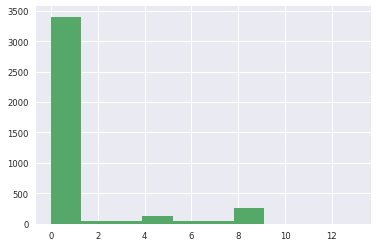

In [53]:
#agrigate population by old VDCS
oldVDC = pop_oldward.groupby(['HLCIT_CODE_VDC'], group_keys=True).sum()
pop_oldVDC = oldVDC['POPULATION']
print(pop_oldVDC.shape)
#pop_oldVDC.head()
oldVDC.elevation_above_1500m.hist()
plt.show()

In [8]:
VDC_count = pop_oldward.groupby(['HLCIT_CODE_DIST']).nunique()
VDC_count['HLCIT_CODE_VDC'].mean()

52.973333333333336

In [137]:
#create source dummies! 
s=df['SOURCE TYPE'].str.split('" "')
source_dum = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=0)
source_dum.columns = source_dum.columns.str.strip()
source_dum = source_dum.groupby(source_dum.columns, axis=1).sum()
source_dum

Apan Dainik  Direct Report  INSEC  Local Newspaper: Achham  \
INCIDENT DATE                                                               
2017-01-01               0              0      0                        0   
2017-01-02               0              0      1                        0   
2017-01-03               0              0      0                        0   
2017-01-04               0              0      1                        0   
2017-01-05               0              0      1                        0   
2017-01-06               0              0      2                        0   
2017-01-07               0              0      2                        0   
2017-01-08               0              0      1                        0   
2017-01-09               0              0      2                        0   
2017-01-10               0              0      0                        0   
2017-01-11               0              0      2                        0   
2017-01-12               0              0      2                        0   
2017-01-13               0              0      4                        0   
2017-01-14               0              0      0                        0   
2017-01-15               0              0      1                        0   
2017-01-16               0              0      2                        0   
2017-01-17               0              0      0                        0   
2017-01-18               0              0      2                        0   
2017-01-19               0              0      3                        0   
2017-01-20               0              0      2                        0   
2017-01-21               0              0      0                        0   
2017-01-22               0              0      0                        0   
2017-01-23               0              0      0                        0   
2017-01-24               0              0      2                        0   
2017-01-25               0              0      1                        0   
2017-01-26               0              0      1                        0   
2017-01-27               0              0      2                        0   
2017-01-28               0              0      1                        0   
2017-01-29               0              0      1                        0   
2017-01-30               0              0      1                        0   
...                    ...            ...    ...                      ...   
2017-12-01               0              0      3                        0   
2017-12-02               0              0      3                        0   
2017-12-03               0              0      2                        0   
2017-12-04               0              0      4                        0   
2017-12-05               0              0      5                        0   
2017-12-06               0              0      2                        0   
2017-12-07               0              0      2                        0   
2017-12-08               0              0      2                        0   
2017-12-09               0              0      0                        0   
2017-12-10               0              0      0                        0   
2017-12-11               0              0      2                        0   
2017-12-12               0              0      0                        0   
2017-12-13               0              0      0                        0   
2017-12-14               0              0      0                        0   
2017-12-15               0              0      1                        0   
2017-12-16               0              0      1                        0   
2017-12-17               0              0      0                        0   
2017-12-18               0              0      1                        0   
2017-12-19               0              0      0                        0   
2017-12-20 

In [9]:
#Create df of incidents by VDC
codes = df['HLCIT CODE'] 
shortcodes = codes.apply(lambda x: x[:17])
#create dummy columns (onehot encode)
incidents_VDC = pd.get_dummies(df, columns=['Violent vs non-violent', 'One-sided vs two-sided', 'Number of Deaths',
       'Collective vs interpersonal', 'Forms and Causes',
       'Event form - primary', 'Event form - secondary', 'Weapon', 'Weapon 2',
       'Cause - primary', 'Cause - secondary', 'Crosscutting issues',
       'Actor 1 - Perpetrator', 'Actor 1 - Number of People',
       'Actor 1 - Perpetrator Type', 'Actor 1 Entity Name',
       'Actor 1 - Youth -25 years or below- involvement',
       'Actor 2 - Perpetrator 2 or Target', 'Actor 2 Numbers',
       'Target - if one-sided violence',
       'Perpetrator 2 - if two-sided violence', 'Actor 2 entity name',
       'Actor 2 - Youth -25 years or below- involvement', 'Impacts','Election-related specific cause secondary'])
incidents_VDC['HLCIT CODE'] = shortcodes
incidents_VDC = incidents_VDC.groupby(['HLCIT CODE']).sum()
incidents_VDC = incidents_VDC.dropna(axis=1, how='all')
incidents_VDC = incidents_VDC.drop(['Ward','Ward(New)','INCIDENT NUMBER','LATITUDE','LONGITUDE','VERIFIED'],axis=1)

#Join the incidents to population by VDC

pop_incidents_VDC = pop_oldVDC.to_frame()
pop_incidents_VDC = pop_incidents_VDC.join(incidents_VDC)

#pop_deaths_VDC['Deaths'] = Deaths
#pop_deaths_VDC = pop_deaths_VDC[0:-1]

#pop_deaths_VDC.shape
pop_incidents_VDC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3973 entries, 524 1 01 01 5 001 to 524 5 14 75 5 041
Columns: 677 entries, POPULATION to Election-related specific cause secondary_Intraparty competition
dtypes: float64(676), int64(1)
memory usage: 20.7+ MB


In [87]:
#Agrigate incidents and population by VDC
#(pop_incidents_VDC['Total Killed'].sum()/pop_incidents_VDC.POPULATION.sum())*100000
#min_sum = [x for x in pop_incidents_VDC.columns if pop_incidents_VDC[x].sum() > 40]
#print(min_sum)
#pop_incidents_VDC = pop_incidents_VDC[min_sum]
    
abrcol = pop_incidents_VDC.columns.tolist()
pop_incidents_VDC.columns = [ x[0:35] + ' ... ' + x[-35:] if len(x) > 100 else x for x in abrcol]

pop_incidents_VDC

POPULATION  Total Killed  Female Killed  \
HLCIT_CODE_VDC                                               
524 1 01 01 5 001       14974           0.0            0.0   
524 1 01 01 5 002        3605           NaN            NaN   
524 1 01 01 5 003        2413           1.0            0.0   
524 1 01 01 5 004        2214           NaN            NaN   
524 1 01 01 5 005        4111           NaN            NaN   
524 1 01 01 5 006        2691           NaN            NaN   
524 1 01 01 5 007        1135           NaN            NaN   
524 1 01 01 5 008        1701           NaN            NaN   
524 1 01 01 5 009        2227           NaN            NaN   
524 1 01 01 5 010         730           NaN            NaN   
524 1 01 01 5 011        3768           NaN            NaN   
524 1 01 01 5 012        3386           NaN            NaN   
524 1 01 01 5 013        1303           NaN            NaN   
524 1 01 01 5 014        1703           NaN            NaN   
524 1 01 01 5 015        2979           NaN            NaN   
524 1 01 01 5 016         908           NaN            NaN   
524 1 01 01 5 017        1559           NaN            NaN   
524 1 01 01 5 018        2250           0.0            0.0   
524 1 01 01 5 019        2093           NaN            NaN   
524 1 01 01 5 020        2267           0.0            0.0   
524 1 01 01 5 021        2346           NaN            NaN   
524 1 01 01 5 022        1832           NaN            NaN   
524 1 01 01 5 023        2357           NaN            NaN   
524 1 01 01 5 024        2133           NaN            NaN   
524 1 01 01 5 025         629           NaN            NaN   
524 1 01 01 5 026        1048           NaN            NaN   
524 1 01 01 5 027        1754           NaN            NaN   
524 1 01 01 5 028        4034           0.0            0.0   
524 1 01 01 5 029        3748           NaN            NaN   
524 1 01 01 5 030        3719           1.0            0.0   
...                       ...           ...            ...   
524 5 14 75 5 012        8577           0.0            0.0   
524 5 14 75 5 013        4906           NaN            NaN   
524 5 14 75 5 014        2186           NaN            NaN   
524 5 14 75 5 015        3018           NaN            NaN   
524 5 14 75 5 016        2431           0.0            0.0   
524 5 14 75 5 017        1672           NaN            NaN   
524 5 14 75 5 018        1907           NaN            NaN   
524 5 14 75 5 019        3572           NaN            NaN   
524 5 14 75 5 020        2808           NaN            NaN   
524 5 14 75 5 021        2977           NaN            NaN   
524 5 14 75 5 022        2981           0.0            0.0   
524 5 14 75 5 023        1532           NaN            NaN   
524 5 14 75 5 024        3151           1.0            1.0   
524 5 14 75 5 025        4272           NaN            NaN   
524 5 14 75 5 026        3356           NaN            NaN   
524 5 14 75 5 027        2293           NaN            NaN   
524 5 14 75 5 028        4675           0.0            0.0   
524 5 14 75 5 029        2456           0.0            0.0   
524 5 14 75 5 030        4339           NaN            NaN   
524 5 14 75 5 031        2536           0.0            0.0   
524 5 14 75 5 032        4272           NaN            NaN   
524 5 14 75 5 033        4727           0.0            0.0   
524 5 14 75 5 034        2886           NaN            NaN   
524 5 14 75 5 035        4924           0.0            0.0   
524 5 14 75 5 036        4211           0.0            0.0   
524 5 14 75 5 037        3667           0.0            0.0   
524 5 14 75 5 038        4705           NaN            NaN   
524 5 14 75 5 039        4348           NaN            NaN   
524 5 14 75 5 040        3821           0.0            0.0   
524 5 14 75 5 041        2551           0.0            0.0   

                   Youth -25 years or below- killed  Total Injured  \
HLCIT_CODE_VDC                            

In [88]:
pop_incidents_VDC.columns

Index(['POPULATION', 'Total Killed', 'Female Killed',
       'Youth -25 years or below- killed', 'Total Injured', 'Female Injured',
       'Total no. of Rape or Attempted Rape',
       'Female no. Rape or Attempted Rape',
       'Rape or Attempted Rape - Youth - 25 years or below', 'Total Abducted',
       ...
       'Target - if one-sided violence_Political organization/Politician - UML and affiliated org (0402)',
       'Target - if one-sided violence_Private sector - Private company (1101)',
       'Target - if one-sided violence_Security forces - Police (0101)',
       'Perpetrator 2 - if two-sided violence_ ()',
       'Perpetrator 2 - if two-sided violence_Citizen/Individuals (2001)',
       'Perpetrator 2 - if two-sided violen ... ian - UML and affiliated org (0402)',
       'Perpetrator 2 - if two-sided violence_Security forces - Police (0101)',
       'Actor 2 - Youth -25 years or below- involvement_No-youth',
       'Actor 2 - Youth -25 years or below- involvement_Unknown',
 

In [89]:
# Calculate overall homicide rate. 
tkilled = pop_incidents_VDC['Total Killed'].sum()
tpop = pop_incidents_VDC['POPULATION'].sum()
hrate = round(tkilled/tpop*100000,2)
print(' Total Killed:', int(tkilled),'\n'\
      ,'Population:',int(tpop),'\n'\
      , 'Homicide Rate Per 100,000:', hrate)

 Total Killed: 431 
 Population: 26253639 
 Homicide Rate Per 100,000: 1.64


## Functions:
As I progressed some of the functions for creating graphs began to take up some space. I moved them here to avoid breaking up the narrative.

In [90]:


#Create time series plots
#Agrigate by week / month 
#imweek = imdate.resample('W').sum()
#immonth = imdate.resample('M').sum()

def dc(m,d):
    return dt.datetime(2017,m,d)
    
def adddates(Range,df,ann):
#Create background colors and annotations based on time spans
    dtdict = {}
    begin = dc(2,20)
    end = dc(5,1)
    dtdict['Local Registration'] = [begin,end,'blue',0.05]
    begin = dc(5,2)
    end = dc(5,21)
    dtdict['1st Local'] = [begin,end,'blue',0.1]
    begin = dc(6,18)
    end = dc(7,5)
    dtdict['2nd Local'] = [begin,end,'blue',0.1]
    begin = dc(9,6)
    end = dc(9,25)
    dtdict['3rd local'] = [begin,end,'blue',0.1]
    begin = dc(9,24)
    end = dc(12,14)
    dtdict['HoR / Provincial'] = [begin, end, 'blue',0.05]
    #if ann == True:
    ymin, ymax = plt.ylim()
    xoffset = 0        
    for span in dtdict:  
        begin = dtdict[span][0]
        end = dtdict[span][1]
        c = dtdict[span][2]
        a = dtdict[span][3]
        for spn in dtdict:
            thatdate = dtdict[spn][0]
            if begin.month == thatdate.month: #(abs(othertop - top) < 3) and
                    #print(begin.month)
                days = begin.day - thatdate.day
                if days < 20 and days > 0:
                    xoffset = days * 2
                    #print(span, days, xoffset)
                #print(ymax, top)
        plt.axvspan(begin, end, color=c, alpha=a*2)
        if ann == True:
            plt.annotate(span, xy=(begin, ymax), xytext=(xoffset,3), textcoords='offset points', fontsize='x-large',color=c, alpha=a+0.5)
            
#plot killed and injured
def plotimpact(Range,title,interval,df,ann):
    top = 0
    imps=df.columns.tolist()

    for impact in Range:    
        n=imps.index(impact)
        c=catpal[n]
        plt.plot(impact, data=df, c=c)
        #print(c)
    
    elstr = ''
    adddates(Range,df,ann)
    elstr = ' - Election Rounds Highlighted'
    #plt.xlabel('Month')
    #plt.ylabel(interval + 'ly Total')
    #plt.title(title + ' ' + interval + elstr)
    plt.yticks(fontsize='large')
    plt.legend(loc='best', fontsize='medium')
    sns.despine()
    #sns.palplot(pal)
    #plt.show()


def fullrun(interval, df, cats, ann):
    imps=df.columns
    
    if 'Killed' in cats:
        plotimpact(imps[0:3],'Total Killed by',interval,df,ann)
    if 'Injured' in cats:
        plotimpact(imps[3:5],'Total Injured by', interval,df,ann)
    if 'Rapes' in cats:
        plotimpact(imps[5:8],'Total Rapes by', interval,df,ann)
    if 'Abductions' in cats:
        plotimpact(imps[8:11],'Total Abductions by', interval,df,ann)
    if 'Physical' in cats: 
        plotimpact(imps[11:],'Physical Damage by', interval,df,ann)

#fullrun('Week', imweek)
#fullrun('Month', immonth)

<a href='#top'>Back to top</a>
<a id='Question-2'></a>
## Investigation:


Simply dividing the sum of the Total Killed by the sum of the population per district (divided by 100,000) yields a homicide rate of about 1.68 per 100,000 people. This can be used as a sanity check for subsequent figures.


In [91]:
#heatmap function
import seaborn as sns 
def plotheat(df,title):
    corr = df.corr(min_periods=130)
    #highcorr = [corr[x].nlargest(2)[1] > .95 for x in corr.index]
    highcorr = [corr[x].std() > .1 for x in corr.index]
    print(highcorr)
    corr = corr[highcorr]
    corr = corr[:][corr.index]
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(22,16))
    
    #set title
    ax.set_title(title, fontsize='x-large')
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    #create a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    
    
    #create heatmap
    hm = sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidth=0.5)
    #print(corr.head())
    
    plt.xticks(fontsize='medium')
    plt.yticks(fontsize='medium')
    #label with pearson values
    def labelp(corr):
        for row in range(0,corr.shape[0]):
            for column in range(0,corr.shape[1]):
                pvalue = round(corr.iloc[column][row],2)
                if mask[column][row]==True and row!=column:
                    hm.text(column+0.5, row+0.6, pvalue, horizontalalignment='center', verticalalignment='center', size='small', color='purple')
    #labelp(corr)
    #plt.show()
    

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


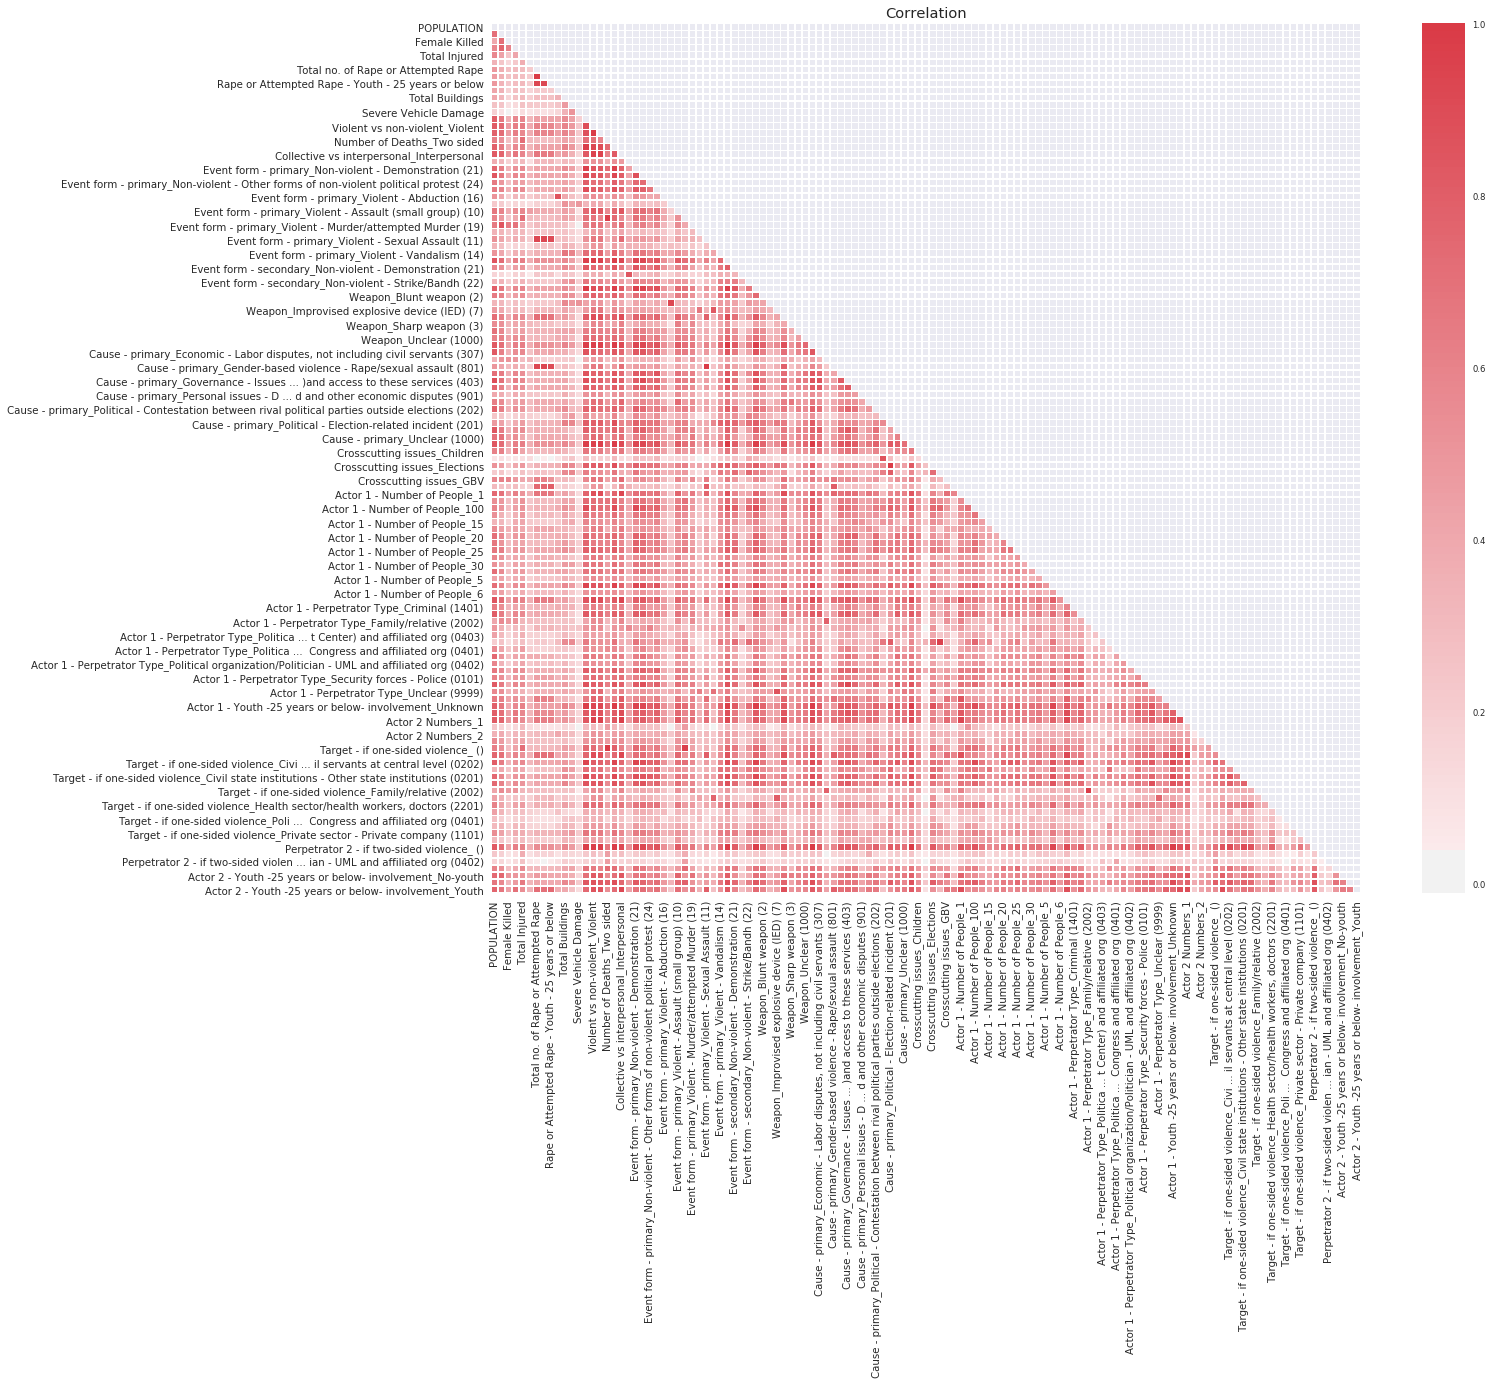

In [92]:
#plot heat maps
#imdist_pop_no_prov = imdist_pop.drop('Province', axis=1)
plotheat(pop_incidents_VDC,'Correlation')
#plotheat(norm_incidents_VDC, 'Correlation of Impacts - Per 100,000 Population')
plt.show()

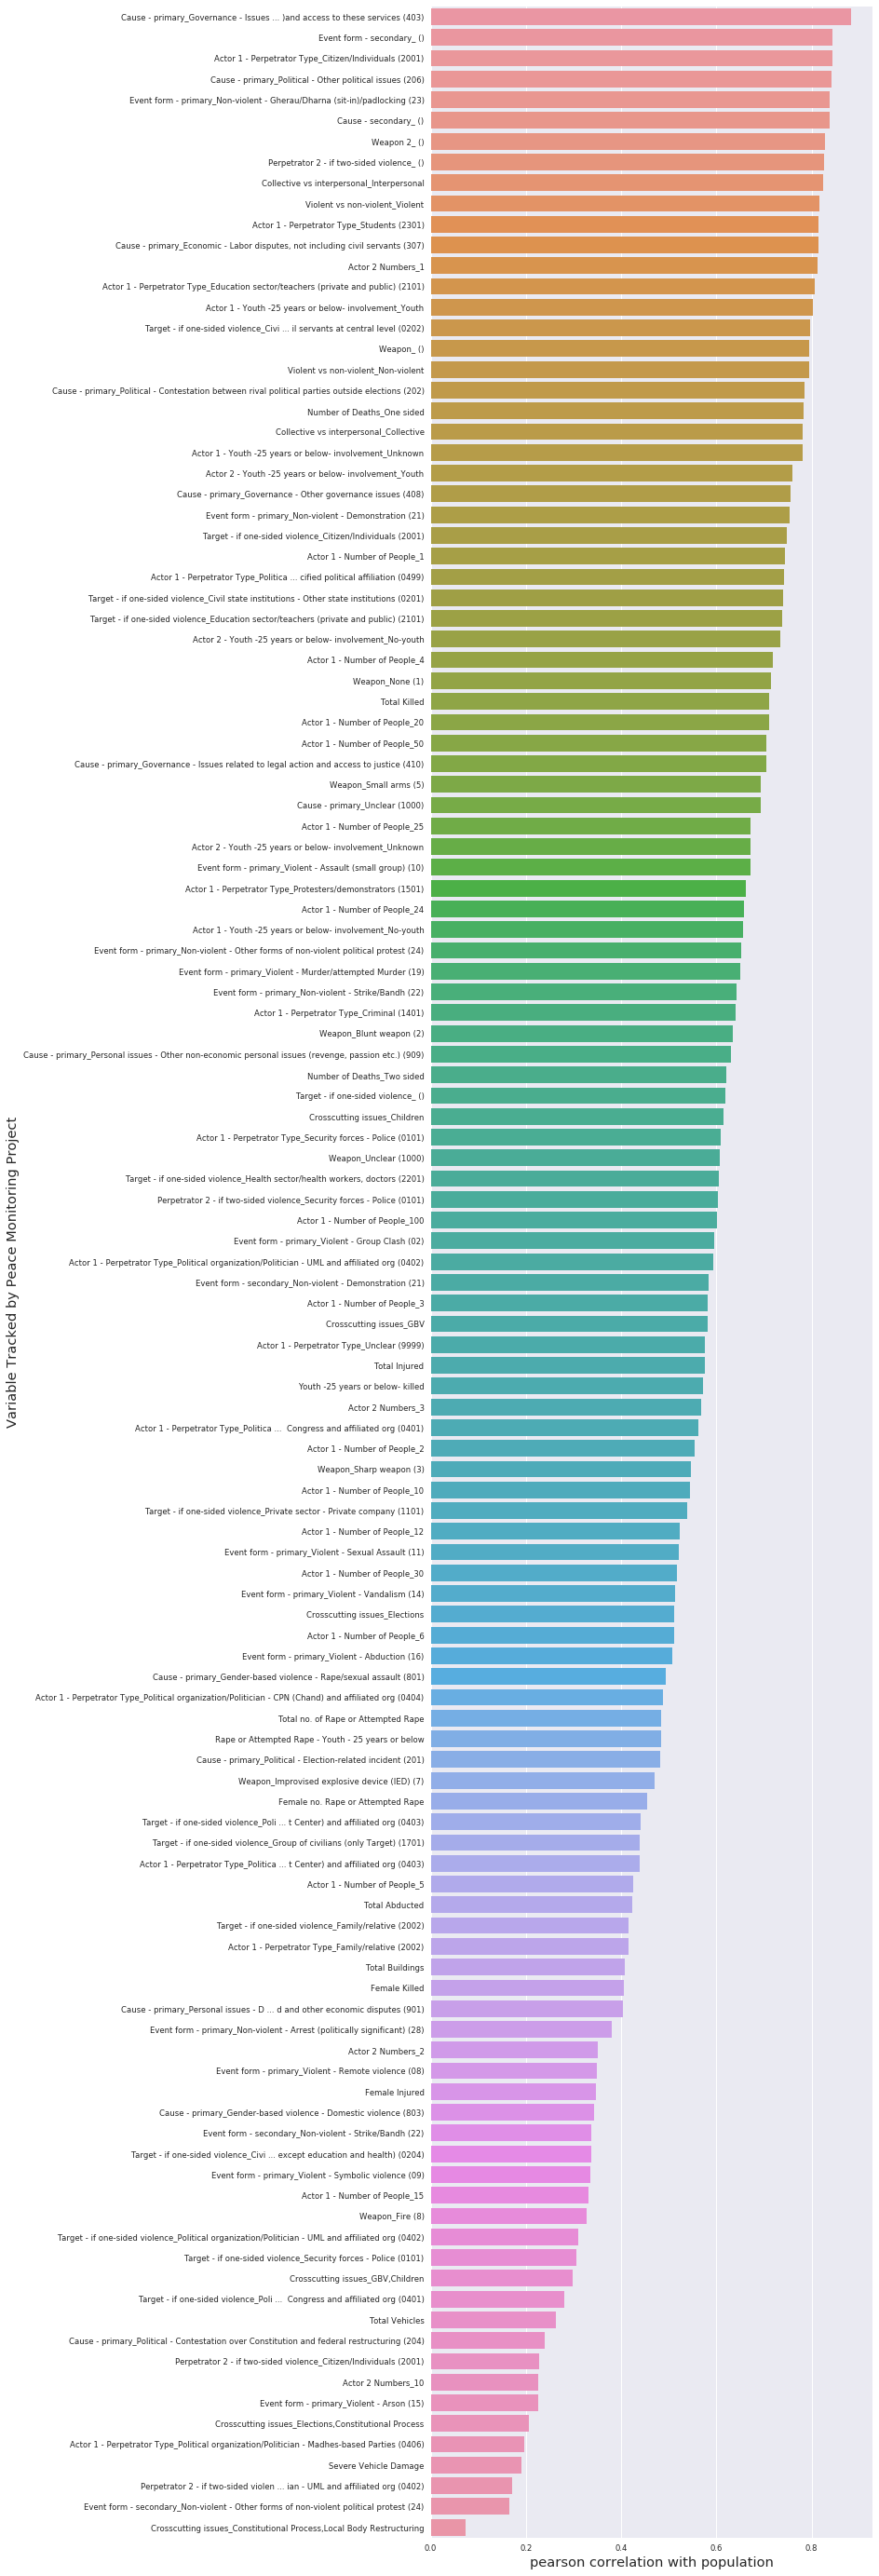

In [68]:
#sort correlation with population
corr = pop_incidents_VDC.corr(min_periods=130)
#narrow correlation matrix down to just population
popcorr = corr['POPULATION']

#take 'population' out because it will correlate with self 1:1
popcorr.drop('POPULATION', inplace=True)
#sort values
popcorr = popcorr.sort_values(ascending=False)
#popcorr = popcorr[:50]

#clrs = ['red' if (x == '\'white\' name' or x == '\'black\' name') else 'grey' for x in callcorr.index]
#plot all the correlations with call numbers
f, ax = plt.subplots(1,1)
sns.barplot(y=popcorr.index, x=popcorr)# palette=clrs)
f.set_size_inches(8.5,50)
ax.set_xlabel('pearson correlation with population', fontsize='x-large')
ax.set_ylabel('Variable Tracked by Peace Monitoring Project', fontsize='x-large')
plt.show()

A correlation heat map of all impacts shows a slight correlation between nearly all impacts, save for severe building damage. This could be a function of all these impacts being correlated with population. The highest overall correlation with population appears to be "Total Killed." 

Controlling for population by using impact numbers re-mapped per 100,000 population reveals a few interesting hot-spots. Some correlations between impacts are obvious, as they reflect overlapping events. For example, "Female Killed" is a subset of "Total Killed" so both should be correlated with each other. The same applies for "Total injured" v. "Female Injured," "Total no. Rape or Attempted Rape" v. female and youth rape, etc. Total killed numbers still show slight correlations with most other impacts, even when controlling for population, including injuries, rapes, abductions, and building damage. This may be a result of multiple impacts resulting from the same major events, but perhaps also shows there are some commonalities beyond population numbers which might predict where violence takes place. Incorporating other demographic information could be informative.

Other interesting correlations in the population normalized heat map: 
- Total/Female Injured and Total Buildings damaged (pearsonr = 0.51).
- Total Buildings and Total Vehicles (pearsonr = 0.47) 
- Population and abductions (pearsonr = 0.17 - 0.28 despite normalization)
- Negative correlation between population and injuries per capita (pearsonr = -0.22)
- Higher correlation between Total Injured and Youth - below 25 - Killed (0.66) than Female Killed and Total Killed (0.45)


The effect of controlling for district population can be seen above.  The histograms in the left show the raw distribution of 'Total Killed' and 'Total Injured, with their similar skew to the right, indicating more districts have lower impact numbers and fewer districts have higher impact numbers. 

The histograms on the right show the same impacts per 100,000 population. While 'normalizing' the 'Total Killed' by population creates a more normal (bell shaped) distribution, doing the same to 'Total Injured,' barely changes the shape of the distribution at all. A theoretical normal distribution has been overlaid the Total Killed per 100,000 to show the similarity. 

More complex attempts at normalizing the 'Total Injured' numbers remain to be explored.

In [27]:
#Try normality test + total killed
from scipy import stats

#boot strap confidence interval for mean
#create bootstrap function

def bsVDC_all(size=390):
        VDCs = np.random.choice(pop_incidents_VDC.index, size=size)
        lst = pop_incidents_VDC.loc[VDCs].sum()
        return lst
    

def bsVDC_by_no(variable,size=390):
        VDCs = np.random.choice(pop_incidents_VDC.index, size=size)
        lst = pop_incidents_VDC.loc[VDCs]
        pop = lst['POPULATION'].sum()
        variable = lst[variable].sum()
        bs_VDCs = [variable,pop]
        return bs_VDCs

def bsVDC_by_pop(variable,size=2000000):
        pop = 0
        out = 0
        VDCs = np.random.choice(pop_incidents_VDC.index, size=500)
        #while pop < size:
         #   np.append(VDCs, np.random.choice(pop_incidents_VDC.index, size=1))
        lst = pop_incidents_VDC.loc[VDCs]
        pop = lst['POPULATION'].sum()
        #print(pop)
        while pop > size:
            reduce = 1 + int((pop - size) / 100000)
            lst = lst[0:-reduce]
            pop = lst['POPULATION'].sum()
            #print(pop,reduce)
        out = lst[variable].sum()                
        bs_VDCs = [out,pop]
        return bs_VDCs

#call bootstrap function for mean

bs_VDCs = pd.DataFrame()
for i in range(10000):
    lst = bsVDC_all()
    bs_VDCs[i] = lst
    #print(i)
bs_VDCs = bs_VDCs.transpose()
bs_VDCs.head()

POPULATION  Total Killed  Female Killed  Youth -25 years or below- killed  \
0   2423508.0          39.0           20.0                              10.0   
1   2254718.0          48.0           17.0                              15.0   
2   2487822.0          38.0           17.0                              27.0   
3   2177958.0          49.0           22.0                              19.0   
4   2562780.0          36.0           13.0                              12.0   

   Total Injured  Female Injured  Total no. of Rape or Attempted Rape  \
0          179.0            30.0                                 19.0   
1          125.0            16.0                                 36.0   
2          202.0            18.0                                 30.0   
3           99.0            12.0                                 32.0   
4          174.0            24.0                                 33.0   

   Female no. Rape or Attempted Rape  \
0                               19.0   
1                               36.0   
2                               30.0   
3                               32.0   
4                               32.0   

   Rape or Attempted Rape - Youth - 25 years or below  Total Abducted  \
0                                               16.0              1.0   
1                                               29.0              5.0   
2                                               25.0              3.0   
3                                               26.0              3.0   
4                                               28.0              5.0   

                           ...                            \
0                          ...                             
1                          ...                             
2                          ...                             
3                          ...                             
4                          ...                             

   Target - if one-sided violence_Political organization/Politician - UML and affiliated org (0402)  \
0                                                8.0                                                  
1                                               11.0                                                  
2                                               15.0                                                  
3                                                6.0                                                  
4                                               14.0                                                  

   Target - if one-sided violence_Private sector - Private company (1101)  \
0                                                2.0                        
1                                                7.0                        
2                                                7.0                        
3                                                4.0                        
4                                                8.0                        

   Target - if one-sided violence_Security forces - Police (0101)  \
0                                                5.0                
1                                                3.0                
2                                                4.0                
3                                                4.0                
4                                               11.0                

   Perpetrator 2 - if two-sided violence_ ()  \
0                                      199.0   
1                                      192.0   
2                                      287.0   
3                                      195.0   
4                                      280.0   

   Perpetrator 2 - if two-sided violence_Citizen/Individuals (2001)  \
0                                                3.0                  
1                                                6.0                  
2                                          

In [29]:
bs_VDCs['Total Injured'].mean()

178.3176

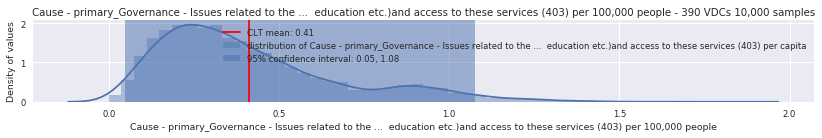

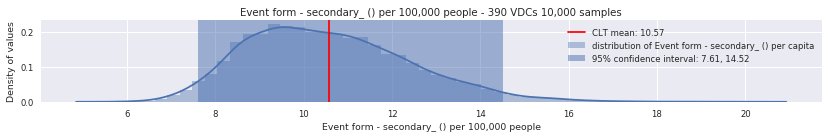

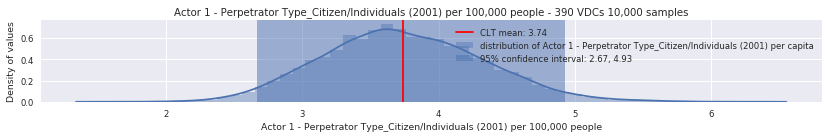

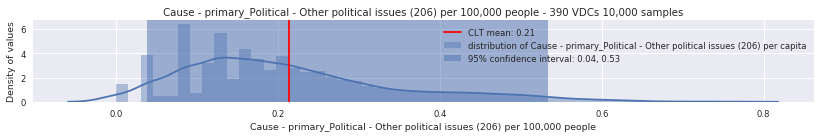

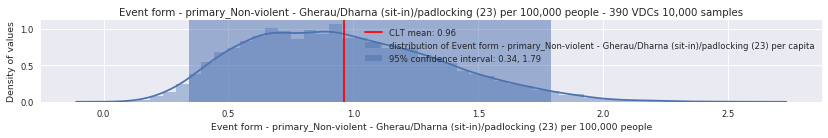

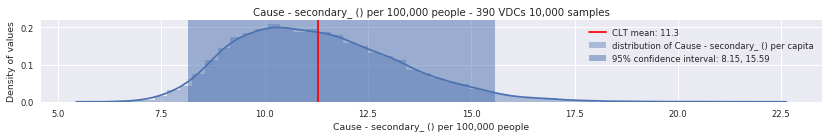

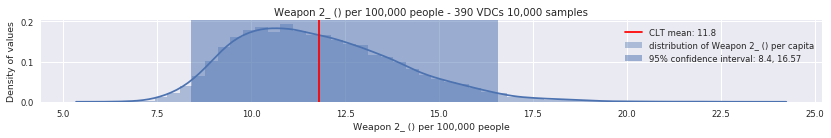

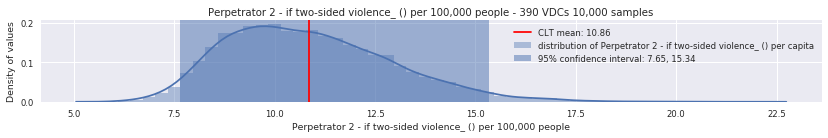

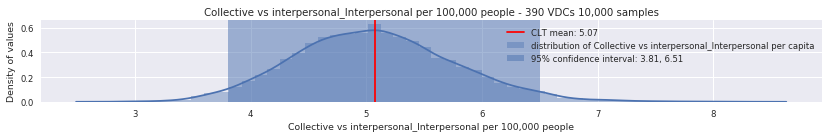

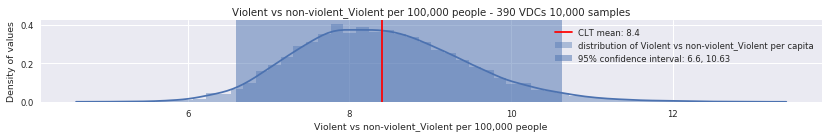

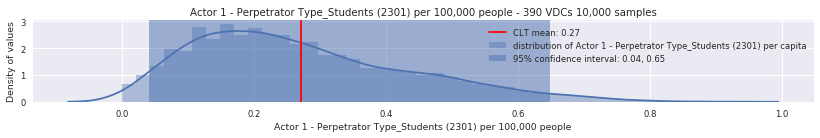

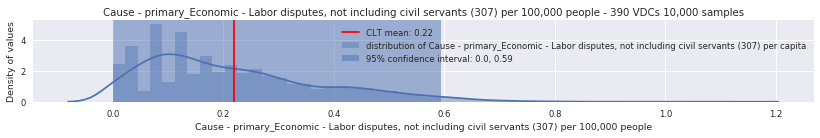

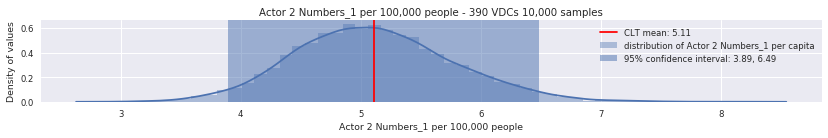

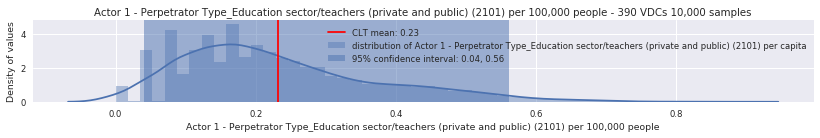

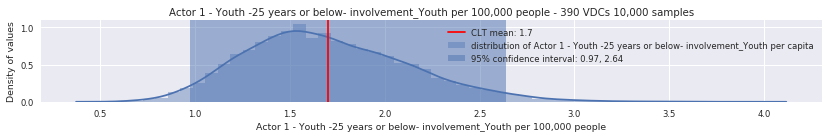

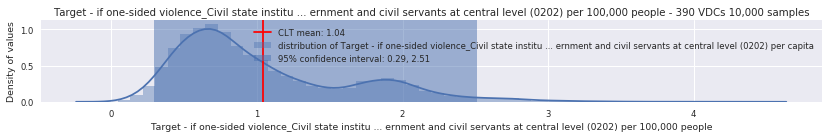

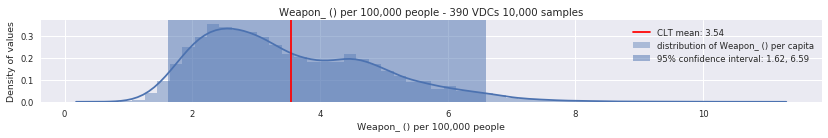

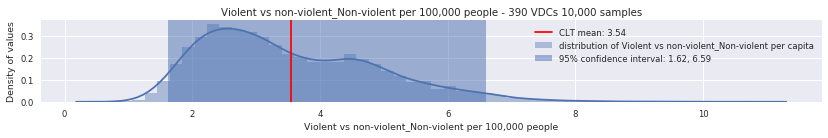

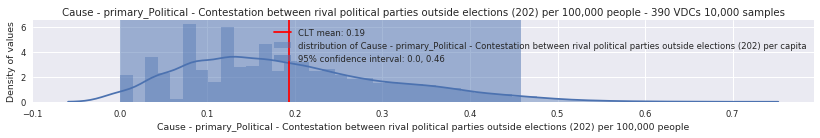

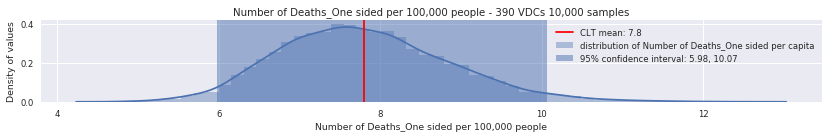

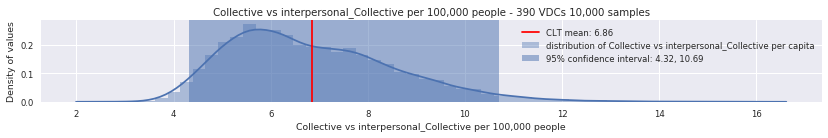

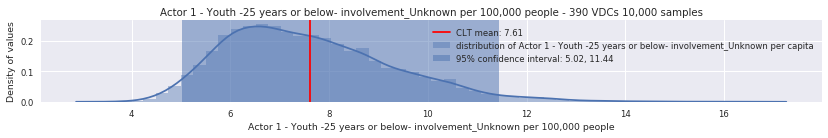

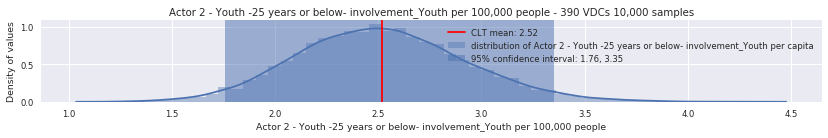

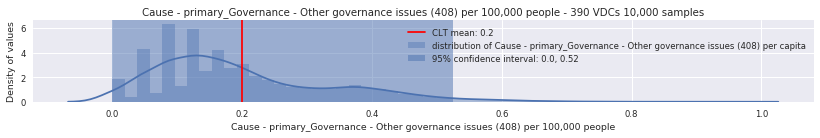

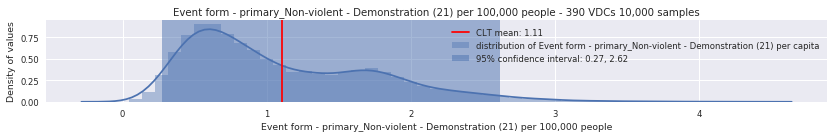

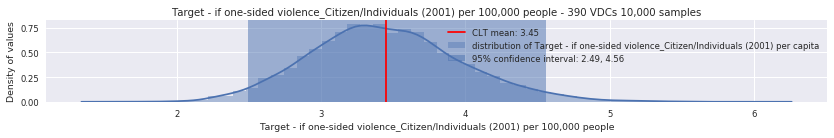

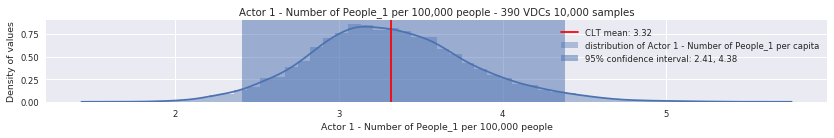

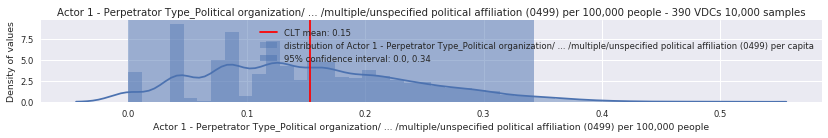

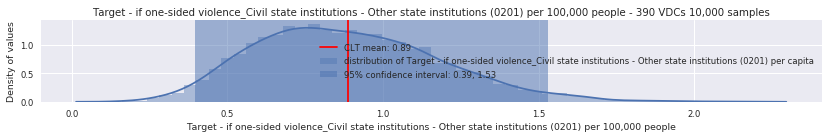

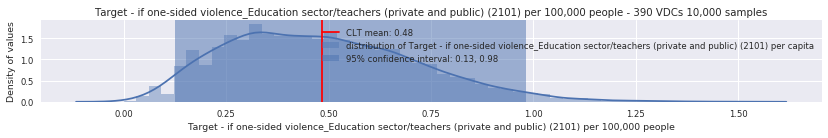

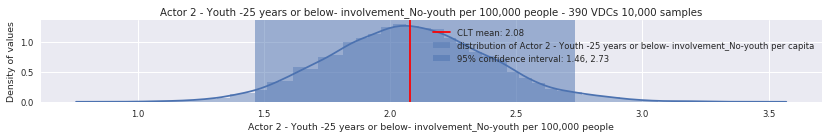

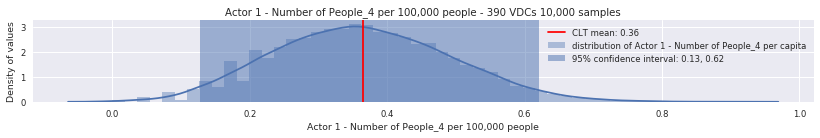

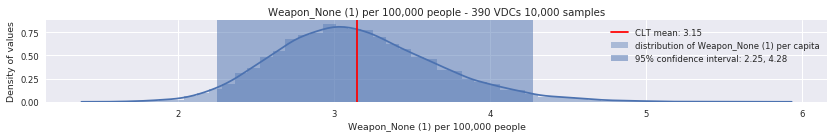

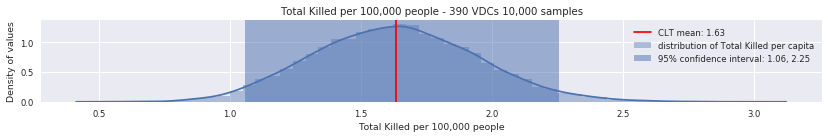

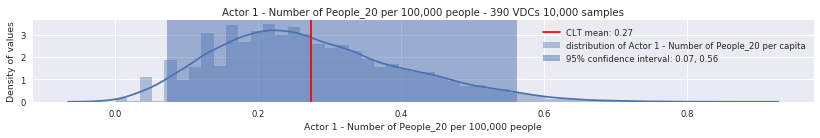

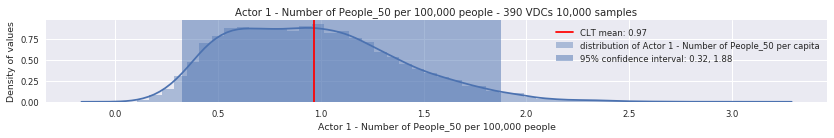

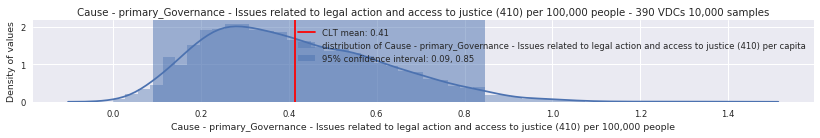

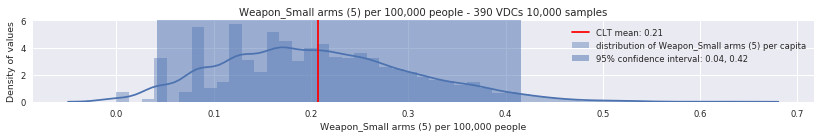

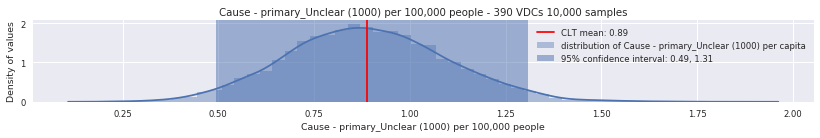

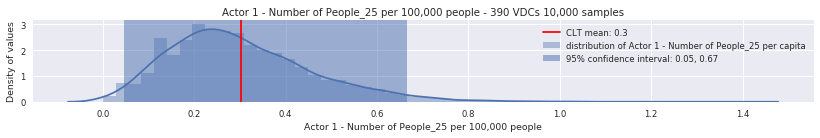

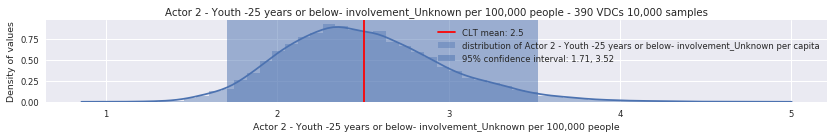

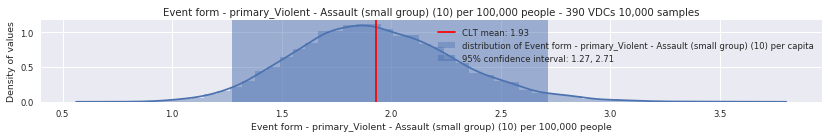

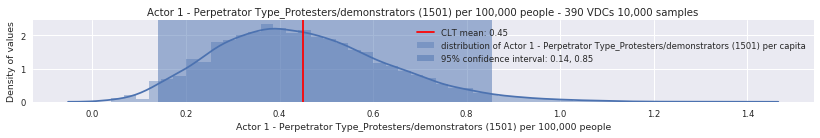

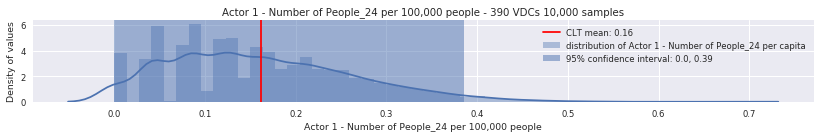

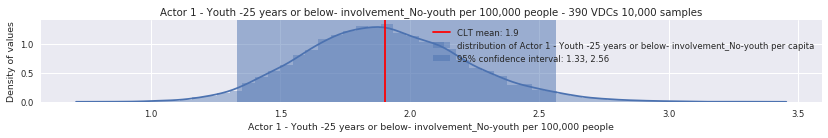

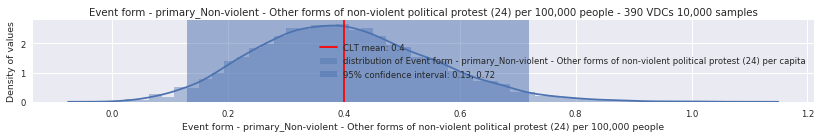

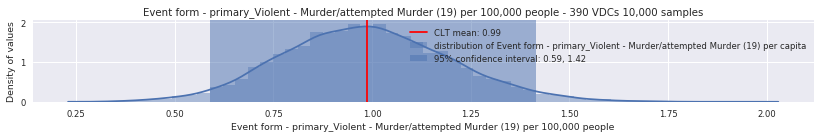

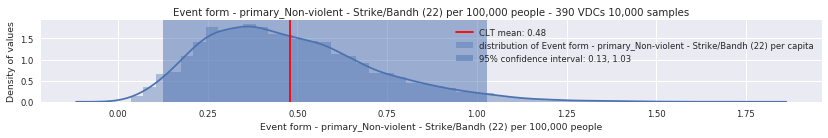

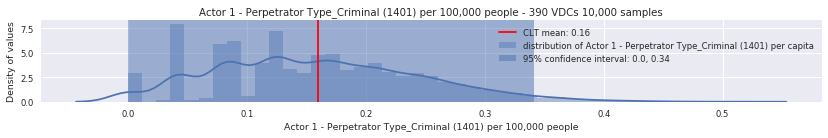

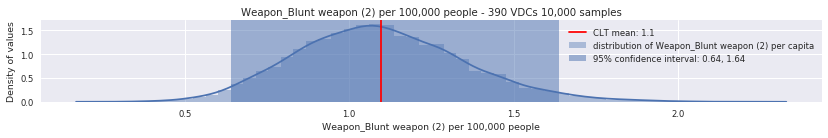

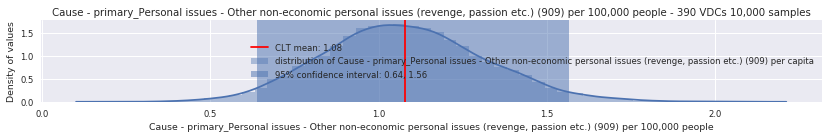

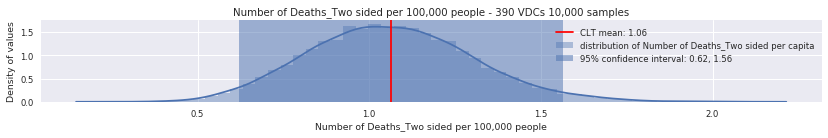

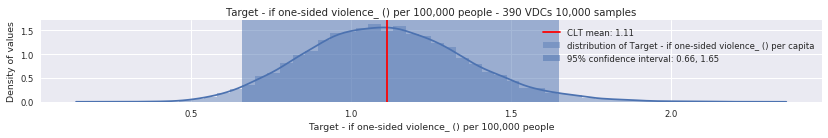

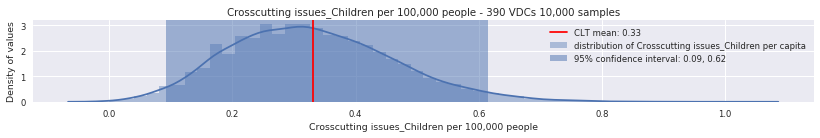

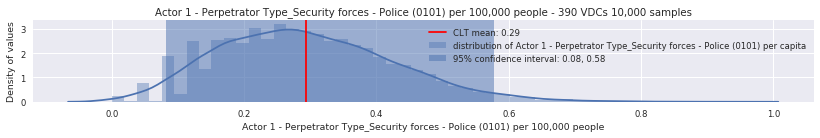

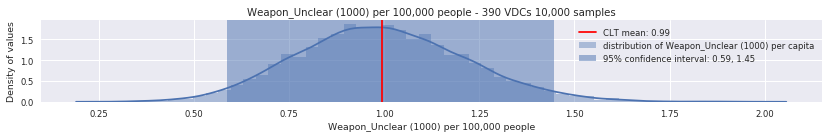

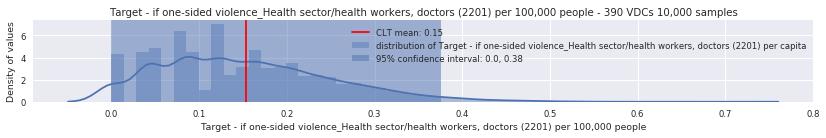

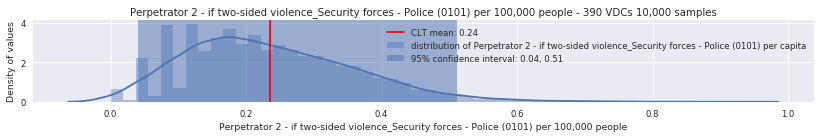

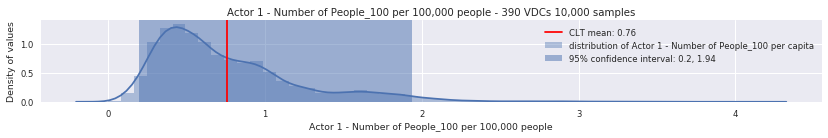

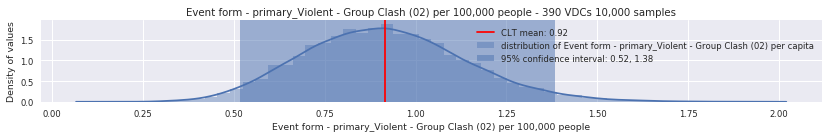

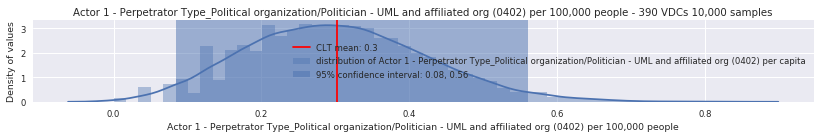

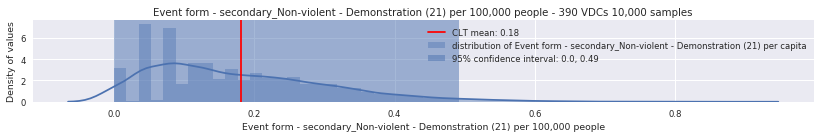

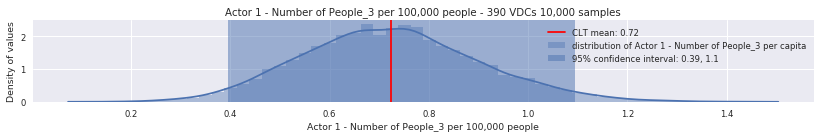

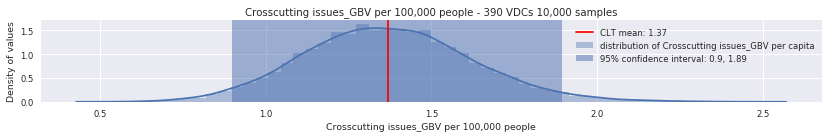

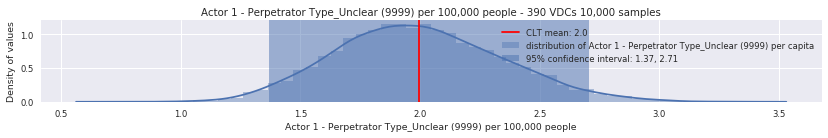

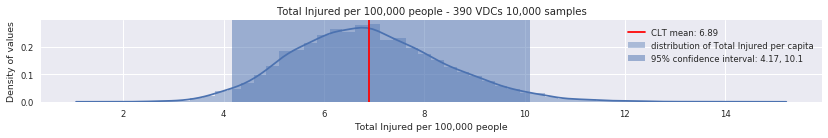

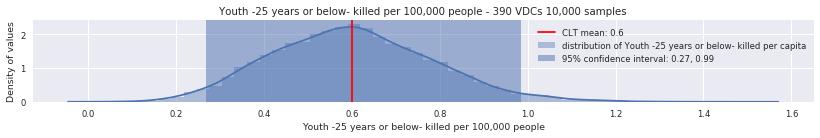

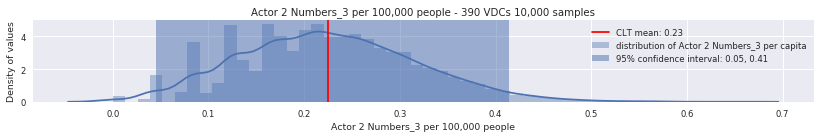

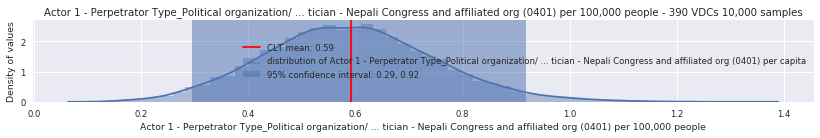

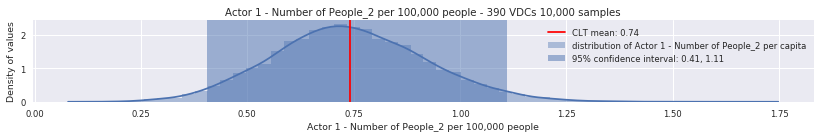

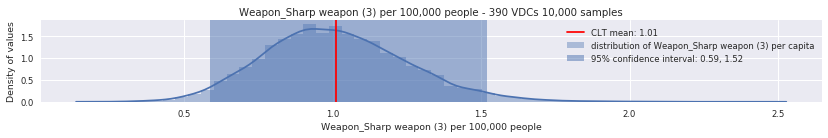

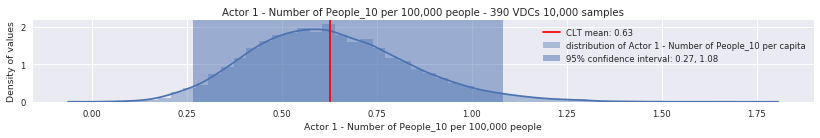

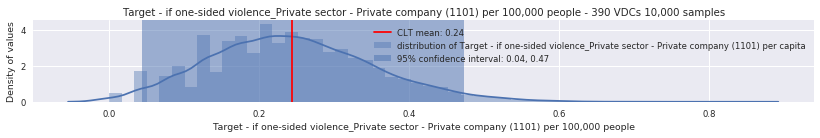

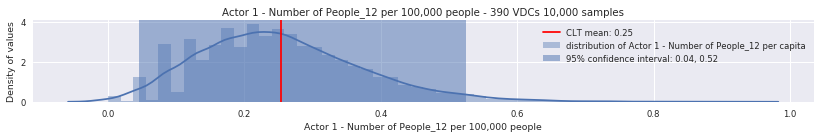

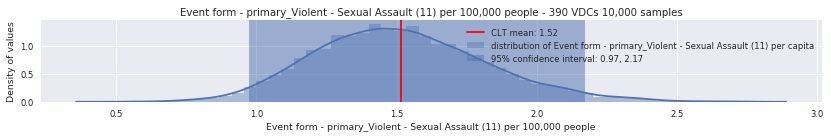

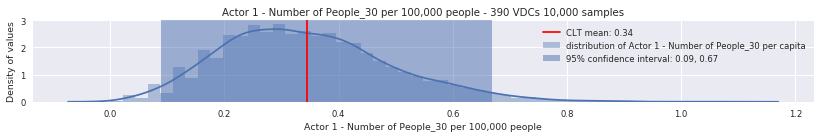

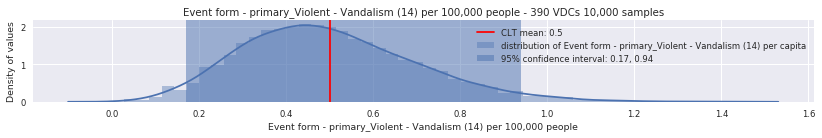

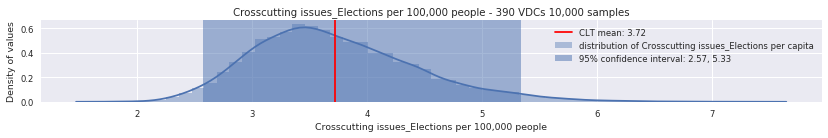

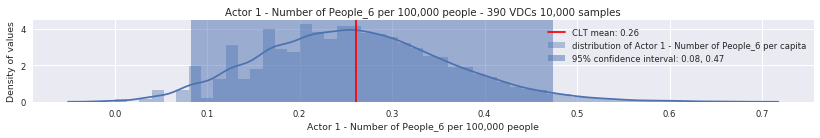

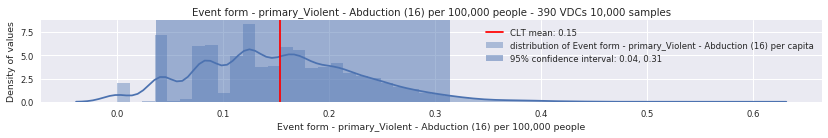

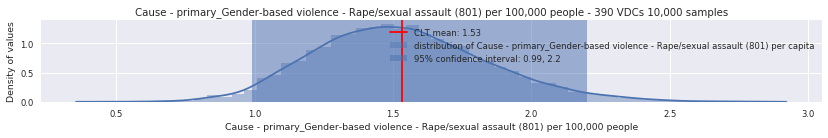

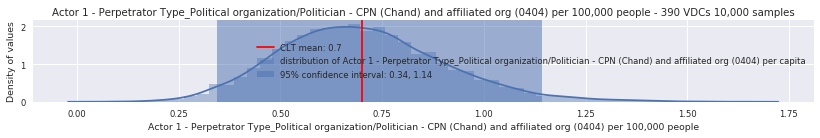

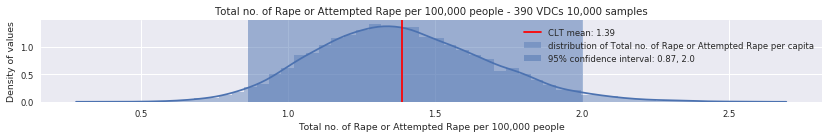

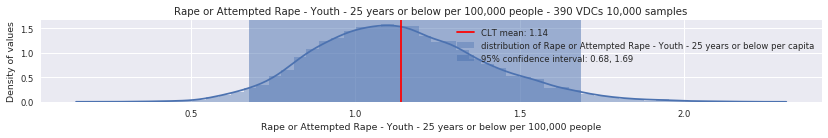

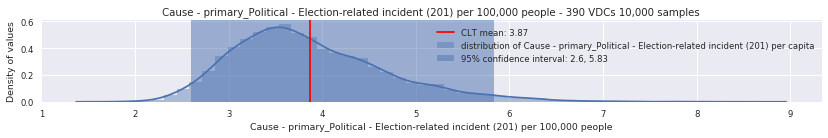

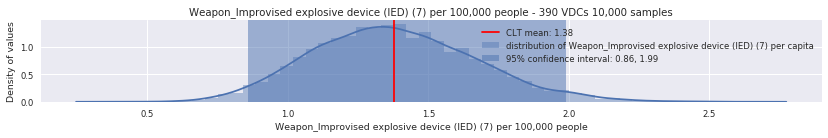

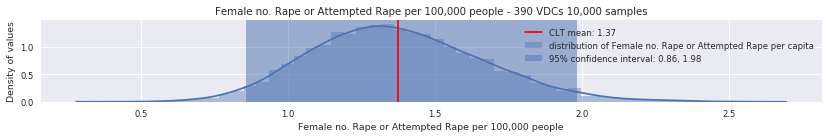

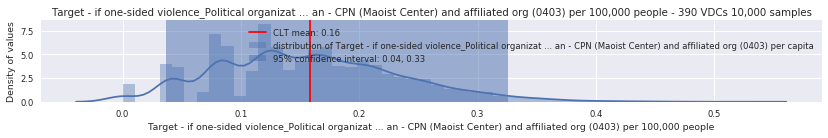

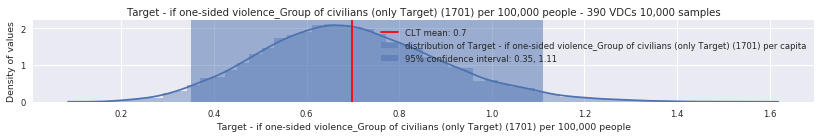

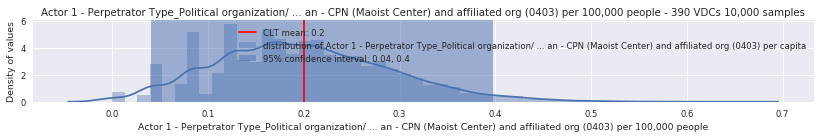

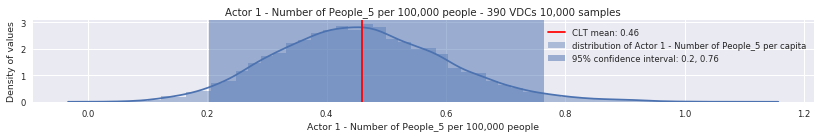

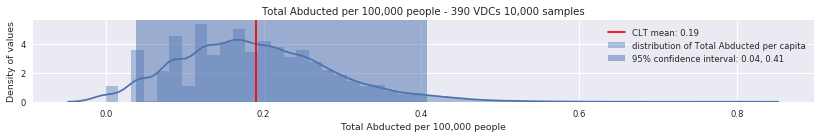

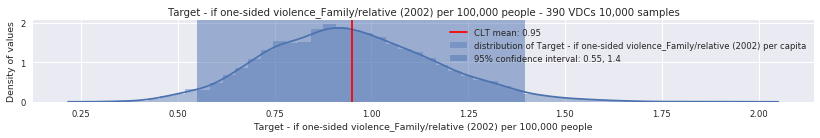

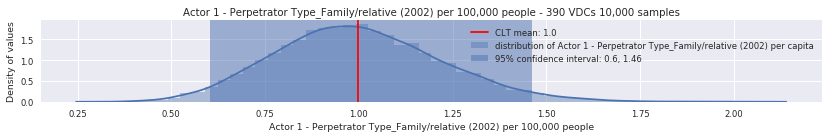

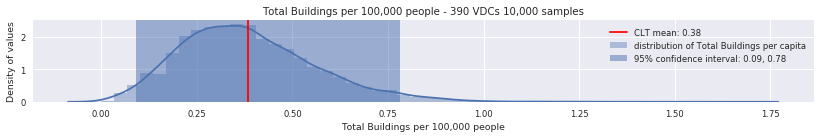

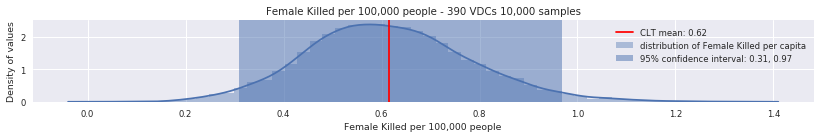

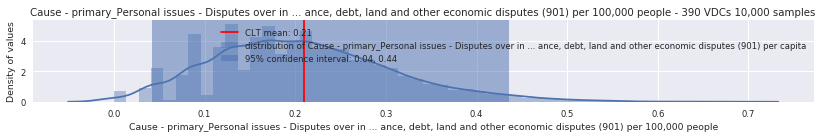

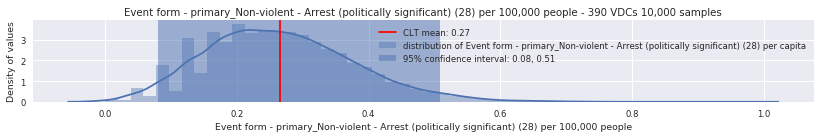

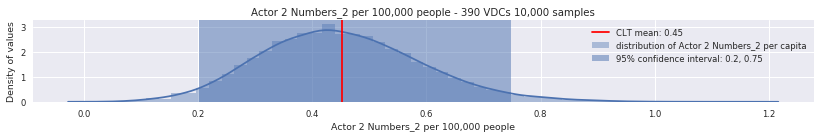

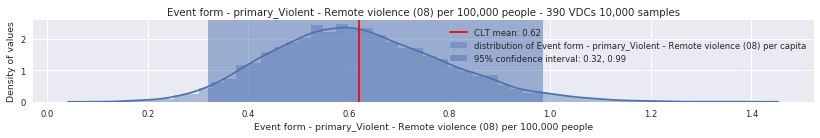

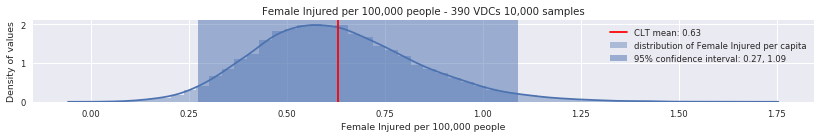

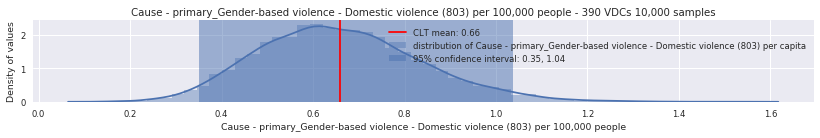

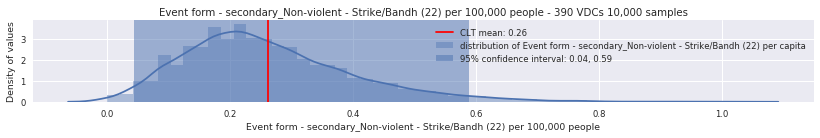

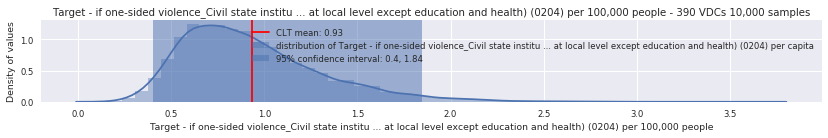

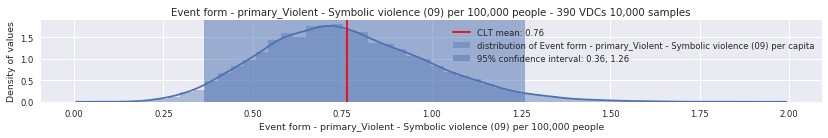

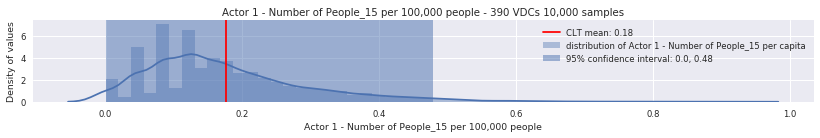

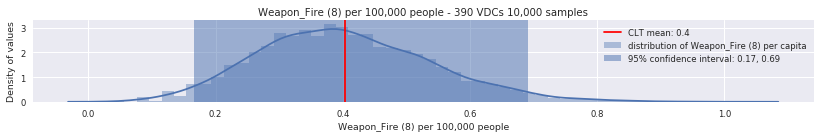

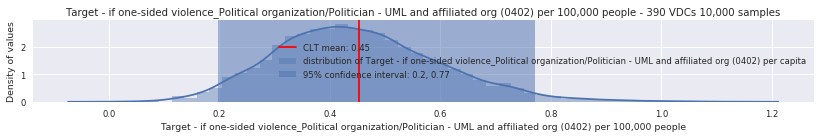

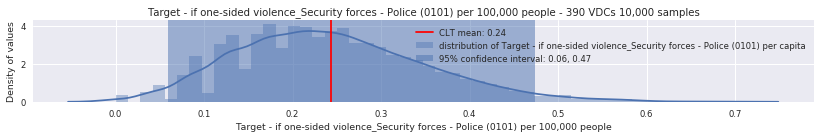

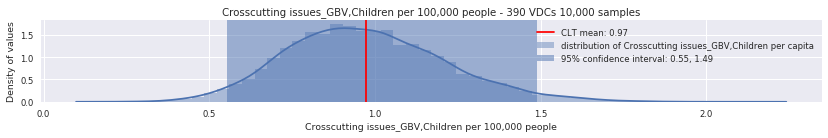

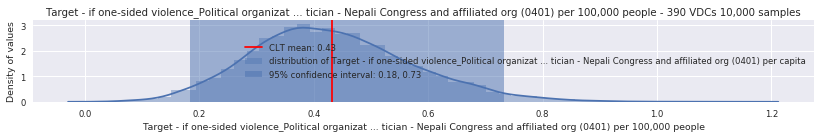

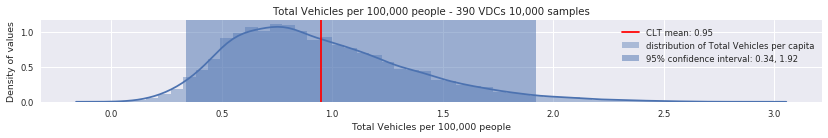

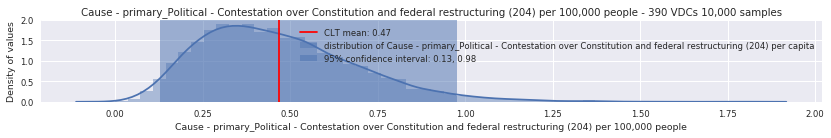

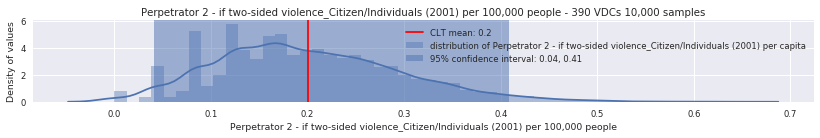

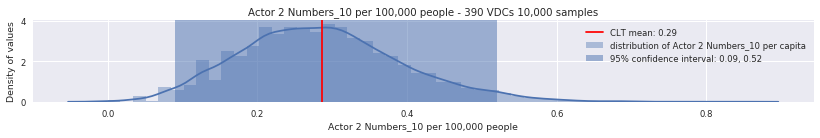

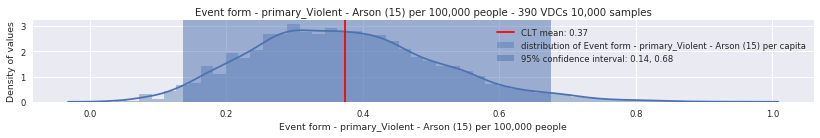

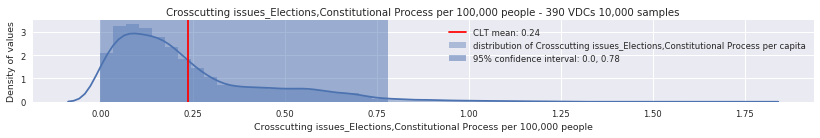

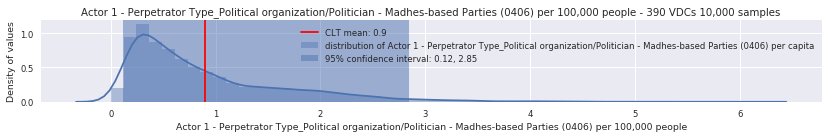

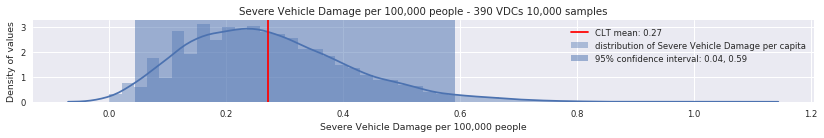

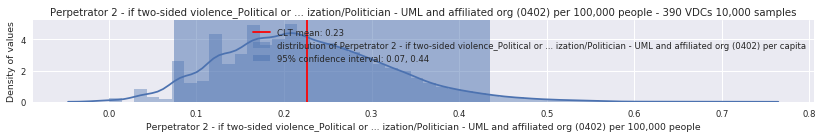

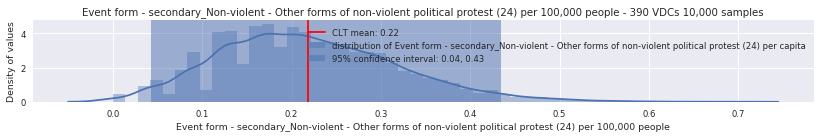

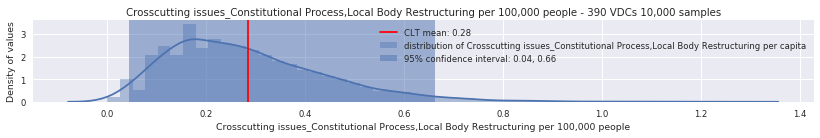

In [32]:
def plot95(var):
    bs_total = bs_VDCs[var]/bs_VDCs.POPULATION * 100000
    cltmean = np.mean(bs_total)

    #find 95% confidence interval for mean
    conf95 = np.percentile(bs_total, [2.5,97.5])
    #make a string out of it
    constr = str(round(conf95[0],2))+', '+str(round(conf95[1],2))

    f, ax = plt.subplots(figsize=(14,1.5))
    sns.distplot(bs_total, label='distribution of '+var+' per capita')
    ax.axvspan(conf95[0],conf95[1], alpha=.5, label='95% confidence interval: '+constr)
    ax.axvline(cltmean, color='r',label='CLT mean: '+str(round(cltmean,2)))
    plt.title(var+' per 100,000 people - 390 VDCs 10,000 samples')
    plt.xlabel(var+' per 100,000 people')
    plt.ylabel('Density of values')
    plt.legend()
    plt.show()

for var in popcorr.index:
    plot95(var)


After establishing that the distribution of total killed per 100,000 people is approximately normal, A confidence interval can establish "what is abnormal," as well as where the 'actual' value is likely to be regardless of sampling error. This cannot be done effectively with a by-district sample, because with 75 districts it is impossible to draw a sample that is both less than 10% of the dataset and over the threshold needed for the central limit theorem to apply.  To account for this, we can divide our dataset into the next geographical unit down, the "Village Development Committee" (VDC). We can then draw 390 VDC's from the dataset (just under 10%), divide the total reported deaths by it's population, and do this 10,000 times. This should hopefully account for much of the random variation of reports being missed or included in the dataset.


Using 'Total Killed' as an example, 95% of the simulations result in a value between 1.06, and 2.27 'Total Killed' per 100,000 people. The methodology is not based on a random sample of the population, but on a comprehensive effort to map all media reports. So, we can interpret this result to mean that in 2017 violent deaths in Nepal were reported by the media at a rate between 1.06 and 2.27 deaths per 100,000 people with 95% confidence. 

Most of the other impacts can effectively be normalized by population using this method. The impacts not showing obvious bell shaped distributions are unlikely to be correlated as directly with population as other factors which remain to be explored


Zooming in to plot province 2 alone, it is clear that Sarlahi has seen the lowest Total Killed in 2017 while possessing the highest population. But, is the 2nd Province's bucking the trend a result of unusually low deaths in Sarlahi, or unusually high deaths in the other districts?

In [44]:
#Create jointplots of incidents v. population. 
import seaborn as sns


def plot2joints(y1,y2):

    #plot 2 jointplots 
    sns.set(font_scale=0.85)
    JG1 = sns.jointplot(x='POPULATION', y=y1, data=bs_VDCs, kind='reg', size=10)
    plt.close()
    JG2 = sns.jointplot(x='POPULATION', y=y2, data=bs_VDCs, kind='reg', size=10)
    plt.close()
    
    
    #subplots migration
    f = plt.figure()
    #fig.set_size_inches(16,8)
    for J in [JG1, JG2]:
        for A in J.fig.axes:
            f._axstack.add(f._make_key(A), A)
    
    
    #subplots size adjustment
    f.axes[0].set_position([0.1, 0.06, 0.4,  0.4])
    f.axes[1].set_position([0.1, 0.45, 0.4,  0.05])
    f.axes[2].set_position([0.5, 0.06, 0.05, 0.4])
    f.axes[3].set_position([0.65, 0.06, 0.4,  0.4])
    f.axes[4].set_position([0.65, 0.45, 0.4,  0.05])
    f.axes[5].set_position([1.05, 0.06, 0.08, 0.4])
    #f.axes.set_size_inches(16,8)
    f.suptitle(y1+'/'+y2+' v. Population per District', x=1,y=1.5, fontsize='xx-large')
    plt.show()


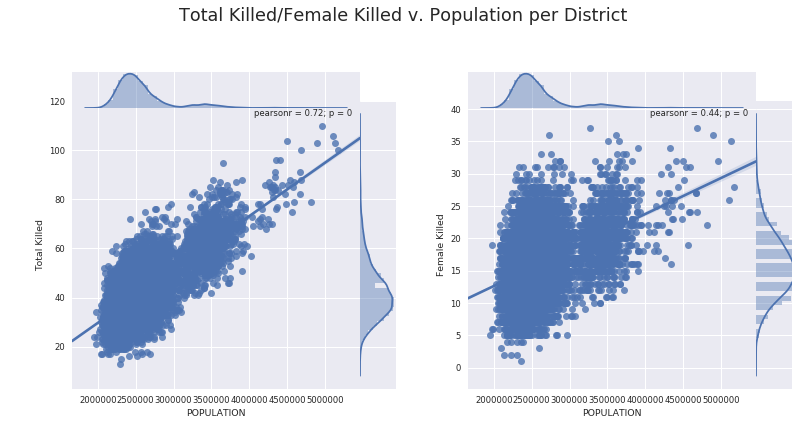

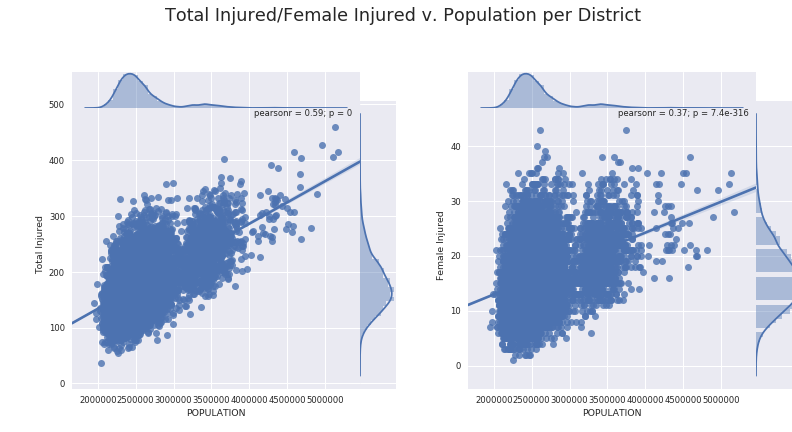

In [45]:
#plot two joint plots
yl = ['Total Killed', 'Female Killed',\
      'Total Injured', 'Female Injured']

#we plot2joints before we plot2joints
plot2joints(yl[0],yl[1])
#and then we plot two more. 
plot2joints(yl[2],yl[3])